In [1]:
# import necessary lib
import matplotlib.pyplot as plt
import numpy as np
import operator as op
from textblob import TextBlob

In [2]:
with open('story.txt', 'r', encoding='utf-8') as fh:
    reviews = fh.readlines()
print(reviews[:2])

['review/summary: Requires too much coordination. Its just bad\n', "review/text: I bought this software for my 5 year old. He has a couple of the other RH software games and he likes them a lot. This game, however, was too challenging for him. The biggest problem I see is that the game requires the child to be able to maneuver the vehicle using all 4 scroll keys on the keyboard. During one exercise, which by the way you can't get to the next level until you complete this exercise, the game requires that you use the keys to move while watching out for falling lava rocks and clouds, monitor a fuel gauge, watch arrow indicators that help you determine where objects are in the arena below, and watch a scope that shows animals when you're hovering over the top of them.I tried to perform this exercise myself and got frustrated. It's just too hard to expect even a 7 year old to complete this exercise let alone a 5 year old.There are some exercises he can complete himself but they mostly requi

In [3]:
print('{:40} : {:10} : {:10}'.format("Review", "Polarity", "Subjectivity") )
for review in reviews:
 #Find sentiment of a review
 sentiment = TextBlob(review)
 #Print individual sentiments
 print('{:40} : {: 01.2f} : {:01.2f}'.format(review[:40]\
 , sentiment.subjectivity, sentiment.polarity) )

Review                                   : Polarity   : Subjectivity
review/summary: Requires too much coordi :  0.43 : -0.25
review/text: I bought this software for  :  0.43 : 0.04

                                        :  0.00 : 0.00
review/summary: You can't pick which par :  0.00 : 0.00
review/text: I got this for my 4 year ol :  0.47 : 0.06

                                        :  0.00 : 0.00
review/summary: Doesn't work on a Mac. t :  1.00 : -1.00
review/text: It clearly says on line thi :  0.69 : 0.05

                                        :  0.00 : 0.00
review/summary: Very Frustrating
        :  1.00 : -0.52
review/text: My three year old son was v :  0.46 : -0.04

                                        :  0.00 : 0.00
review/summary: enjoyable
               :  0.60 : 0.50
review/text: My almost four year old lov :  0.36 : 0.16

                                        :  0.00 : 0.00
review/summary: Lava Landslide perfect
  :  1.00 : 1.00
review/text: I gave this game t

In [4]:
#Categorize Polarity into Positive, Neutral or Negative
labels = ["Positive", "Neutral", "Negative"]
#Initialize count array
values =[0,0,0]

In [5]:
#Categorize each review
for review in reviews:
 sentiment = TextBlob(review)
 
 #Custom formula to convert polarity 
 # 0 = (Positive) 1 = (Neutral) 2=(Negative)
 polarity = round(( sentiment.polarity + 1 ) * 3 ) % 3
 
 #add the summary array
 values[polarity] = values[polarity] + 1
 
print("Final summarized counts :", values)

Final summarized counts : [399, 102, 57]



 Pie Representation 
-------------------


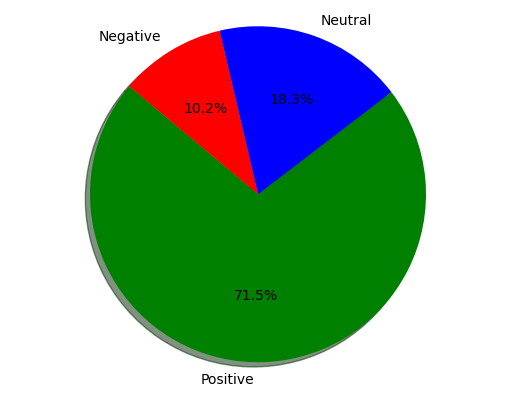

In [6]:
#Set colors by label
colors=["Green","Blue","Red"]
print("\n Pie Representation \n-------------------")
#Plot a pie chart
plt.pie(values, labels=labels, colors=colors, \
 autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()



In [7]:
#Create an empty dictionary 
text_dict = {}

In [8]:
# Create list of Stop Words from a text file
s = open('STOPWORDS.txt', 'r')
stop_list = s.read().split()

In [9]:
# Open & read utf-8 file, convert string to list
with open('Story.txt', 'r', encoding='utf-8') as f:
    list1 = f.read().lower().split()

In [10]:
# Remove punctuations from the list of text
list1 = [word.strip('.,;:?!\\|/$%&#+*@()//_\{}[]^~`-=ufeff') for word in list1]

In [11]:
#remove stop words & count frequences of each word
for word in list1:
    if word not in stop_list:
        if word in text_dict:
            text_dict[word] += 1
        else:
            text_dict[word] = 1

In [12]:
#to get a list of tuples sorted by value
sort_list = sorted(text_dict.items(),
                   key=op.itemgetter(1), reverse=True)

In [13]:
#get first 10 words from sort_list
max_words = sort_list[:10]

In [14]:
# Get list of words from list of tuples
words = list(zip(*max_words)) [0]

In [15]:
#get frequences from list of tuples
frequency = list(zip(*max_words)) [1]

In [16]:
#to add zip function
nb = [1,2,3,4]
nb_name = ['one', 'two', 'three', 'four']

In [17]:
nb_zip_list = list(zip(nb_name, nb))
print(nb_zip_list)

[('one', 1), ('two', 2), ('three', 3), ('four', 4)]


In [18]:
#To get first tuple of name of numbers
name_list =list(zip(*nb_zip_list)) [0]

In [19]:
#to get second tuple of numbers
nb_list =list(zip(*nb_zip_list)) [1]
print(nb_list)

(1, 2, 3, 4)


In [20]:
#because list(zip(*nb_zip_list))
print(list(zip(*nb_zip_list)))

[('one', 'two', 'three', 'four'), (1, 2, 3, 4)]


In [21]:
#to get Y position
y_position = np.arange(len(words))

Text(0.5, 1.0, 'Frequent used words')

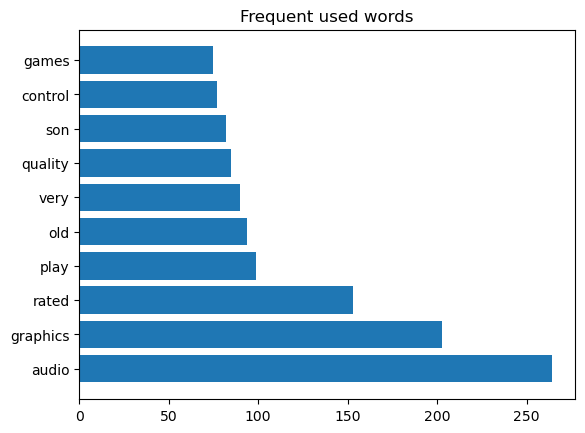

In [22]:
#create horizontal bar chart
plt.barh(y_position, frequency, align = 'center')
plt.yticks(y_position, words)
plt.title('Frequent used words')

In [23]:
from wordcloud import WordCloud

In [24]:
# Read the course descriptions
with open("story.txt", 'r') as fh:
    filedata = fh.read()


In [25]:
#check contents
print("story.txt : ", filedata[:200])

story.txt :  review/summary: Requires too much coordination. Its just bad
review/text: I bought this software for my 5 year old. He has a couple of the other RH software games and he likes them a lot. This game, h


In [26]:
# Create stopword list:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [27]:
#Generate wordcloud data
wordcloud = WordCloud(stopwords=stopwords, max_words=25, \
background_color="white").generate(filedata)


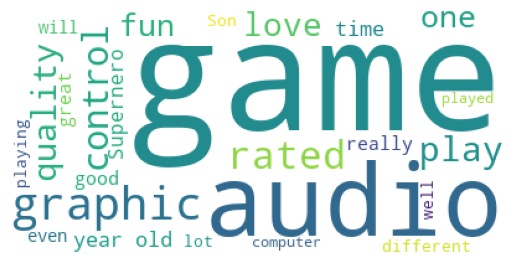

In [28]:
import matplotlib.pyplot as mpLib
mpLib.imshow(wordcloud)
mpLib.axis("off")
mpLib.show()


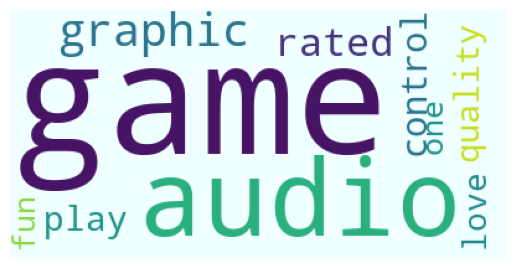

In [29]:
#Add more words to ignore
stopwords.update(["even","year", "will", "playing", "really"])
#Redo stop words. Limit number of words
wordcloud = WordCloud(stopwords=stopwords, max_words=10, \
                      background_color="azure").generate(filedata)

mpLib.imshow(wordcloud)
mpLib.axis("off")
mpLib.show()

In [30]:
from textblob import TextBlob


In [31]:
with open('Story.txt', 'r', encoding='utf-8') as f:
    text = f.read()